In [1]:
import numpy as np 
import pandas as pd

array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>,
        <AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'X7'}>],
       [<AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>,
        <AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>,
        <AxesSubplot:title={'center':'X13'}>,
        <AxesSubplot:title={'center':'X14'}>],
       [<AxesSubplot:title={'center':'X15'}>,
        <AxesSubplot:title={'center':'X16'}>,
        <AxesSubplot:title={'center':'X17'}>,
        <AxesSubplot:title={'center':'X18'}>,
        <AxesSubplot:title={'center':'X19'}>,
        <AxesSubplot:title={'center':'X20'}>,
        <AxesSubplot:title={'center':'X21'}>],
       [<AxesSubplot:title={'center':'X2

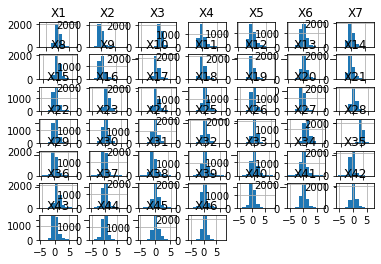

In [2]:
dataMM=pd.read_csv("dataTmm.tsv",sep="\t")
dataMM.index=dataMM['Gene']
dataMM=dataMM.drop('Gene',axis=1)
dataMM.hist()

In [3]:
data_frame = dataMM.T
train_data = data_frame#.iloc[:1000,:]
test_data = data_frame#.iloc[1000:,:]

array([[<AxesSubplot:title={'center':'TFRC'}>,
        <AxesSubplot:title={'center':'SCP2'}>,
        <AxesSubplot:title={'center':'SCFD1'}>, ...,
        <AxesSubplot:title={'center':'NDUFA7'}>,
        <AxesSubplot:title={'center':'SET'}>,
        <AxesSubplot:title={'center':'RPS27A'}>],
       [<AxesSubplot:title={'center':'RNPS1'}>,
        <AxesSubplot:title={'center':'TPD52'}>,
        <AxesSubplot:title={'center':'DNAJC17'}>, ...,
        <AxesSubplot:title={'center':'PANX1'}>,
        <AxesSubplot:title={'center':'LPIN1'}>,
        <AxesSubplot:title={'center':'CISD1'}>],
       [<AxesSubplot:title={'center':'RPL23A'}>,
        <AxesSubplot:title={'center':'TRAPPC3'}>,
        <AxesSubplot:title={'center':'SART1'}>, ...,
        <AxesSubplot:title={'center':'PLOD1'}>,
        <AxesSubplot:title={'center':'RPL27A'}>,
        <AxesSubplot:title={'center':'VKORC1L1'}>],
       ...,
       [<AxesSubplot:title={'center':'TUBB3'}>,
        <AxesSubplot:title={'center':'PTPN12'}>,
  

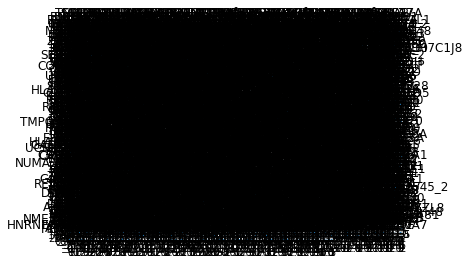

In [4]:
data_frame.hist()

In [5]:
#build model instance, input dimensions need to be 2 times the number of features
from LRPclass_precise import LRP
model = LRP(2*train_data.shape[1], train_data.shape[1],32,2)
model

In [6]:
epochs=100000
lr=0.03
bs=100000
RESULTPATH = './results/mynetwork2/'

In [7]:
# compute network for first sample of test data
import os 
import torch as tc
#train model on train data
#model.train(train_data, test_data,epochs=5000, lr = 0.05, batch_size = 5000)
cuda=True

In [ ]:
model.train(train_data, test_data, epochs=epochs, lr = lr, batch_size=bs, device=tc.device(tc.device("cuda:0" if cuda else "cpu")))

1 tensor(1.3335, device='cuda:0')
5 tensor(1.3073, device='cuda:0')
10 tensor(1.2765, device='cuda:0')
20 tensor(1.2791, device='cuda:0')
50 tensor(1.1264, device='cuda:0')
100 tensor(0.6417, device='cuda:0')
150 tensor(0.5612, device='cuda:0')
200 tensor(0.4574, device='cuda:0')
250 tensor(0.4146, device='cuda:0')
300 tensor(0.4229, device='cuda:0')
350 tensor(0.4097, device='cuda:0')
400 tensor(0.4032, device='cuda:0')
600 tensor(0.3838, device='cuda:0')
800 tensor(0.3906, device='cuda:0')
1000 tensor(0.3900, device='cuda:0')
1200 tensor(0.3570, device='cuda:0')
2000 tensor(0.3438, device='cuda:0')
3000 tensor(0.3103, device='cuda:0')
4000 tensor(0.2967, device='cuda:0')
5000 tensor(0.2916, device='cuda:0')
10000 tensor(0.2393, device='cuda:0')
20000 tensor(0.1691, device='cuda:0')
30000 tensor(0.1329, device='cuda:0')


In [ ]:
print(test_data.shape[0])
for sample_id in range(0,test_data.shape[0]):
    print(sample_id)
    model.compute_network(test_data, sample_name = test_data.index[sample_id], sample_id = sample_id, result_path = RESULTPATH, device = tc.device("cuda:0" if cuda else "cpu"))

In [ ]:
!ls -lth ./results/mynetwork2/raw_data

In [ ]:
train_data = pd.DataFrame(data_frame.iloc[0:9].median(axis=0)).T
#train_data.rename({'Gene' : 'MGUS'}, inplace = True)
#train_data.index="MGUS"
#train_data.columns
#train_data=train_data.drop('Gene',axis=0)
test_data = train_data#.iloc[1000:,:]
test_data

In [ ]:
train_data

In [ ]:
model.compute_network(test_data, sample_name = test_data.index[0], sample_id = 0, result_path = RESULTPATH, device = tc.device('cuda'))

In [ ]:
!ls -lth ./results/mynetwork2/raw_data

In [ ]:
!mv results/mynetwork/raw_data/LRP_0_0.csv results/mynetwork/raw_data/LRP_0_MGUS.csv 

In [ ]:
resultMGUS=pd.read_csv(RESULTPATH+'raw_data/LRP_0_MGUS.csv')
resultMGUS.LRP.hist()

In [ ]:
train_data = pd.DataFrame(data_frame.iloc[9:9+6].median(axis=0)).T
#train_data.rename({'0' : 'lMGUS'}, inplace = True)
#train_data.index="MGUS"
#train_data.columns
#train_data=train_data.drop('Gene',axis=0)
test_data = train_data#.iloc[1000:,:]
test_data

In [ ]:
train_data

In [ ]:
model.compute_network(test_data, sample_name = test_data.index[0], sample_id = 0, result_path = RESULTPATH, device = tc.device('cuda'))

In [ ]:
!mv results/mynetwork/raw_data/LRP_0_0.csv results/mynetwork/raw_data/LRP_0_lMGUS.csv 

In [ ]:
!ls -lth ./results/mynetwork2/raw_data

In [ ]:
resultlMGUS=pd.read_csv(RESULTPATH+'raw_data/LRP_0_lMGUS.csv')
resultlMGUS.LRP.hist()

In [ ]:
train_data = pd.DataFrame(data_frame.iloc[9+6:9+6+31].median(axis=0)).T
#train_data.rename({'0' : 'MM'}, inplace = True)
#train_data.index="MGUS"
#train_data.columns
#train_data=train_data.drop('Gene',axis=0)
test_data = train_data#.iloc[1000:,:]
test_data

In [ ]:
train_data

In [ ]:
model.compute_network(test_data, sample_name = test_data.index[0], sample_id = 0, result_path = RESULTPATH, device = tc.device('cuda'))

In [ ]:
!mv results/mynetwork/raw_data/LRP_0_0.csv results/mynetwork/raw_data/LRP_0_MM.csv 

In [ ]:
!ls -lth ./results/mynetwork2/raw_data

In [ ]:
resultMM=pd.read_csv(RESULTPATH+'raw_data/LRP_0_MM.csv')
resultMM.LRP.hist()